# Import Library and Data Import.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import json
from ast import literal_eval
import datetime
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import plotly.express as px
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df1 = pd.read_excel("/content/gdrive/My Drive/MADT8101/week5/data member.xlsx")
#df1.tail(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df2 = pd.read_excel("/content/gdrive/My Drive/MADT8101/week5/transaction 2021.xlsx")
#df2.tail(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df3 = pd.read_excel("/content/gdrive/My Drive/MADT8101/week5/transaction 2022.xlsx")
#df3.tail(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df4 = pd.read_excel("/content/gdrive/My Drive/MADT8101/week5/transaction 2023.xlsx")
#df4.tail(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data to Dataframe

In [7]:
df_datamember = df1.copy()
df_transaction2021 = df2.copy()
df_transaction2022 = df3.copy()
df_transaction2023 = df4.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Cleaning

In [8]:
# df_transaction2023
# fill NaN with 0
df_transaction2023['discount'] = df_transaction2023['discount'].fillna(0)

# drop NaN because product_json have 9 Null
df_transaction2023 = df_transaction2023.dropna()

df_transaction2023.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 362100 entries, 0 to 362108
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   payment_date       362100 non-null  object 
 1   ent                362100 non-null  object 
 2   center             362100 non-null  object 
 3   product_json       362100 non-null  object 
 4   total_amount       362100 non-null  float64
 5   discount           362100 non-null  float64
 6   paid_amount        362100 non-null  int64  
 7   trans_origin_type  362100 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.9+ MB


In [9]:
# drop the 'original_status' column
df_datamember = df_datamember.drop(columns=['original_status'])

# filter rows where 'join_year' is greater than or equal to 1986
df_datamember = df_datamember[df_datamember['join_year'] >= 1986].reset_index(drop = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# convert 'payment_date' to datetime
df_transaction2021['payment_date'] = pd.to_datetime(df_transaction2021['payment_date'])
df_transaction2022['payment_date'] = pd.to_datetime(df_transaction2022['payment_date'])
df_transaction2023['payment_date'] = pd.to_datetime(df_transaction2023['payment_date'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# create new column 'member' in transaction 2021,2022,2023.
df_transaction2021['member'] = df_transaction2021['ent'].isin(df_datamember['ent']).astype(int)
df_transaction2022['member'] = df_transaction2022['ent'].isin(df_datamember['ent']).astype(int)
df_transaction2023['member'] = df_transaction2023['ent'].isin(df_datamember['ent']).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# create new Dataframe that have only member
df_transaction2021_mem = df_transaction2021[df_transaction2021['member'] == 1].reset_index(drop = True).copy()
df_transaction2022_mem = df_transaction2022[df_transaction2022['member'] == 1].reset_index(drop = True).copy()
df_transaction2023_mem = df_transaction2023[df_transaction2023['member'] == 1].reset_index(drop = True).copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# create new column is join_year
df_transaction2021_mem = pd.merge(df_transaction2021_mem, df_datamember[['ent', 'join_year','join_month']], on='ent', how='inner')
df_transaction2022_mem = pd.merge(df_transaction2022_mem, df_datamember[['ent', 'join_year','join_month']], on='ent', how='inner')
df_transaction2023_mem = pd.merge(df_transaction2023_mem, df_datamember[['ent', 'join_year','join_month']], on='ent', how='inner')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# create new column is join_duration
maxdate2021 = df_transaction2021_mem['payment_date'].max()
df_transaction2021_mem['join_duration(Month)'] = (maxdate2021.year - df_transaction2021_mem['join_year']) * 12 + (maxdate2021.month - df_transaction2021_mem['join_month'])

maxdate2022 = df_transaction2022_mem['payment_date'].max()
df_transaction2022_mem['join_duration(Month)'] = (maxdate2022.year - df_transaction2022_mem['join_year']) * 12 + (maxdate2022.month - df_transaction2022_mem['join_month'])

maxdate2023 = df_transaction2023_mem['payment_date'].max()
df_transaction2023_mem['join_duration(Month)'] = (maxdate2023.year - df_transaction2023_mem['join_year']) * 12 + (maxdate2023.month - df_transaction2023_mem['join_month'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Define a function to calculate total quantity
def calculate_total_qty(product_json):
    products = json.loads(product_json)
    total_qty = sum(item['qty'] for item in products)
    return total_qty

# Apply the function to create a new column in the main DataFrame
df_transaction2021_mem['total_qty'] = df_transaction2021_mem['product_json'].apply(calculate_total_qty)
df_transaction2022_mem['total_qty'] = df_transaction2022_mem['product_json'].apply(calculate_total_qty)
df_transaction2023_mem['total_qty'] = df_transaction2023_mem['product_json'].apply(calculate_total_qty)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Convert trans_origin_type online , offline to int
df_transaction2021_mem['trans_origin_type'] = df_transaction2021_mem['trans_origin_type'].map({'online': 1, 'offline': 0})
df_transaction2021_mem['trans_origin_type'] = df_transaction2021_mem['trans_origin_type'].astype(int)

df_transaction2022_mem['trans_origin_type'] = df_transaction2022_mem['trans_origin_type'].map({'online': 1, 'offline': 0})
df_transaction2022_mem['trans_origin_type'] = df_transaction2022_mem['trans_origin_type'].astype(int)

df_transaction2023_mem['trans_origin_type'] = df_transaction2023_mem['trans_origin_type'].map({'online': 1, 'offline': 0})
df_transaction2023_mem['trans_origin_type'] = df_transaction2023_mem['trans_origin_type'].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
df_transaction2023_mem = df_transaction2023_mem[df_transaction2023_mem['paid_amount'] >= 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
df_datamember.tail(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ent,join_month,join_year,sponsor
578697,H3CCC43B,7,2010,H3CCC4R2
578698,H3CCC4ZY,6,2010,H3CCC4JP
578699,H3CCCEC7,7,2010,H3CCC4JP
578700,H3CCCE4I,7,2010,H3CCC4JP
578701,H3CCCEEF,7,2010,H3CCC4WU


In [19]:
df_transaction2021_mem.tail(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,member,join_year,join_month,join_duration(Month),total_qty
608363,2021-06-23,TCCECQQ1440,TUC1CC,"[{""product"":""5CJCCW"",""qty"":1},{""product"":""8C4C...",1729000.00,189000.00,0,0,1,2021,6,0,3
608364,2021-06-23,TCCECQQ14EU,TUC1CC,"[{""product"":""8CECCZ"",""qty"":1}]",1565000.00,0.00,0,0,1,2021,6,0,1
608365,2021-06-23,TCCECWRQJW5,T7CERW,"[{""product"":""5C4CCE"",""qty"":3},{""product"":""5CJC...",1949000.00,191500.00,0,1,1,2021,6,0,5
608366,2021-06-23,TCCECQQ143K,TUC1CC,"[{""product"":""5CJCCW"",""qty"":1},{""product"":""8C4C...",1729000.00,189000.00,0,0,1,2021,6,0,3
608367,2021-06-23,TCCECQQ1CJI,TUC1CC,"[{""product"":""5CJCCW"",""qty"":1},{""product"":""8C4C...",1729000.00,189000.00,0,0,1,2021,6,0,3


In [20]:
df_transaction2022_mem.tail(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,member,join_year,join_month,join_duration(Month),total_qty
884208,2022-12-31,TCCEJ3C3RJ2,TYCEZ4,"[{""product"":""8C4CC4"",""qty"":1},{""product"":""8C4C...",1796000.00,259000.00,0,0,1,2022,12,0,4
884209,2022-12-31,TCCEJ3C3ZJ7,TYCEZ4,"[{""product"":""5CJC4Q"",""qty"":1},{""product"":""8C4C...",2122000.00,585000.00,0,0,1,2022,12,0,4
884210,2022-12-31,TCC4ZW4QZEY,TKC4EZ,"[{""product"":""XCQCC4"",""qty"":1}]",50000.00,0.00,0,0,1,2022,12,0,1
884211,2022-12-31,TCCE441Z1JI,TDCEQ3,"[{""product"":""XCQCC4"",""qty"":1}]",50000.00,0.00,0,0,1,2022,12,0,1
884212,2022-12-31,TCC4ZW4QZ17,TKC4EZ,"[{""product"":""XCQCC4"",""qty"":1}]",50000.00,0.00,0,0,1,2022,12,0,1


In [21]:
df_transaction2023_mem.tail(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type,member,join_year,join_month,join_duration(Month),total_qty
356762,2023-07-06,TCCEQ1Z1QEF,TUC1Z3,"[{""product"":""KC4CC4"",""qty"":1},{""product"":""0C4C...",1538000.00,0.00,1538000,0,1,2023,7,0,6
356763,2023-07-06,TCCEQ1Z1QW0,TUC1Z3,"[{""product"":""KC4CC4"",""qty"":1},{""product"":""0C4C...",1538000.00,0.00,1538000,0,1,2023,7,0,6
356764,2023-07-06,TCCEQ1Q1CE7,TKC41J,"[{""product"":""7CECCE"",""qty"":1}]",498000.00,0.00,498000,1,1,2023,6,1,1
356765,2023-07-06,TCCEQC144J7,TKC41J,"[{""product"":""0C4CCZ"",""qty"":3}]",477000.00,0.00,477000,0,1,2023,3,4,3
356766,2023-07-06,TCCEQC144J7,TKC41J,"[{""product"":""KC4C1J"",""qty"":1}]",265000.00,0.00,265000,0,1,2023,3,4,1


# Data Preprocessing (Create Customer Single View)

In [22]:
def singleview(df_transaction,df_datamember,year):
  df_SGV = df_transaction.groupby('ent')['join_duration(Month)'].max()
  df_SGV = pd.DataFrame({'ent': df_SGV.index, 'join_duration(Month)': df_SGV.values})

  joined = df_datamember[df_datamember['join_year'] <= year]
  df_sponsor_count = joined.groupby("sponsor").size().reset_index(name="sponsor_count")
  df_sponsor_count = df_sponsor_count.rename(columns={'sponsor': 'ent', 'sponsor_count': 'No_downline'})
  df_SGV = pd.merge(df_SGV, df_sponsor_count[['ent','No_downline']], on='ent', how='left')
  df_SGV['No_downline'] = df_SGV['No_downline'].fillna(0)
  df_SGV['No_downline'] = df_SGV['No_downline'].astype(int)

  s1 = df_transaction.groupby('ent').agg(
      avg_amount = ('total_amount', 'mean'),
      transaction_count=('ent', 'count'),
      avg_ticket_size = ('total_qty','mean'),
      online=('trans_origin_type', 'mean')).reset_index()

  s2 = df_transaction[df_transaction['payment_date'] >= df_transaction['payment_date'].max() - pd.DateOffset(months=3)]\
      .groupby('ent').agg(
      avg_amount_3months = ('total_amount', 'mean'),
      transaction_count_3months=('ent', 'count'),
      avg_ticket_size_3month = ('total_qty','mean'),
      online_3month=('trans_origin_type', 'mean')).reset_index()

  s3 = df_transaction[df_transaction['payment_date'] >= df_transaction['payment_date'].max() - pd.DateOffset(months=6)]\
      .groupby('ent').agg(
      avg_amount_6months = ('total_amount', 'mean'),
      transaction_count_6months=('ent', 'count'),
      avg_ticket_size_6month = ('total_qty','mean'),
      online_6month=('trans_origin_type', 'mean')).reset_index()

  last_transactions = df_transaction.groupby('ent')['payment_date'].max().reset_index()
  last_transactions.rename(columns={'payment_date': 'last_transaction_date'}, inplace=True)
  last_transactions['last_transaction_day'] = (df_transaction['payment_date'].max() - last_transactions['last_transaction_date']).dt.days
  s4 = last_transactions[['ent','last_transaction_day']]

  df_duration = df_transaction.sort_values(by=['ent','payment_date']).copy()
  df_duration["duration_from_previous"] = df_transaction.groupby('ent')['payment_date'].diff().dt.days
  df_duration["duration_from_previous"] = df_duration["duration_from_previous"].fillna(0)
  s5 = df_duration.groupby('ent').agg(mean_time_between_purchase = ('duration_from_previous','mean'),).reset_index()

  lst = [s1,s2,s3,s4,s5]
  for i in lst:
    df_SGV = df_SGV.merge(i, on='ent', how='outer')

  df_SGV = df_SGV.fillna(0)
  return df_SGV

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# create customer single view year 2021
df_SGV_2021 = singleview(df_transaction2021_mem,df_datamember,2021)

#create customer single view year 2021,2022
df_transaction2021_2022_mem =  pd.concat([df_transaction2021_mem, df_transaction2022_mem], axis=0).reset_index(drop = True)
df_SGV_2022 = singleview(df_transaction2021_2022_mem,df_datamember,2022)

#create customer single view year 2021,2022,2023
df_transaction2021_2022_2023_mem =  pd.concat([df_transaction2021_2022_mem, df_transaction2023_mem], axis=0).reset_index(drop = True)
df_SGV_2023 = singleview(df_transaction2021_2022_2023_mem,df_datamember,2023)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Create dataframe downline_sales_2021
downline_sales_2021 = pd.merge(df_transaction2021_mem, df_datamember, on=['ent'], how='inner')
downline_sales_2021 = downline_sales_2021[['sponsor','total_amount']]
downline_sales_2021 = downline_sales_2021.groupby('sponsor')['total_amount'].sum().reset_index()
downline_sales_2021 = downline_sales_2021.rename(columns={'sponsor': 'ent','total_amount': 'downlinesales'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
downline_sales_2021_2022 = pd.merge(df_transaction2021_2022_mem, df_datamember, on=['ent'], how='inner')
downline_sales_2021_2022 = downline_sales_2021_2022[['sponsor','total_amount']]
downline_sales_2021_2022 = downline_sales_2021_2022.groupby('sponsor')['total_amount'].sum().reset_index()
downline_sales_2021_2022 = downline_sales_2021_2022.rename(columns={'sponsor': 'ent','total_amount': 'downlinesales'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Create dataframe downline_sales_2021_2022_2023
downline_sales_2021_2022_2023 = pd.merge(df_transaction2021_2022_2023_mem, df_datamember, on=['ent'], how='inner')
downline_sales_2021_2022_2023 = downline_sales_2021_2022_2023[['sponsor','total_amount']]
downline_sales_2021_2022_2023 = downline_sales_2021_2022_2023.groupby('sponsor')['total_amount'].sum().reset_index()
downline_sales_2021_2022_2023 = downline_sales_2021_2022_2023.rename(columns={'sponsor': 'ent','total_amount': 'downlinesales'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
df_SGV_2021 = pd.merge(df_SGV_2021, downline_sales_2021, on=['ent'], how='left')
df_SGV_2021 = df_SGV_2021.fillna(0)
df_SGV_2021

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ent,join_duration(Month),No_downline,avg_amount,transaction_count,avg_ticket_size,online,avg_amount_3months,transaction_count_3months,avg_ticket_size_3month,online_3month,avg_amount_6months,transaction_count_6months,avg_ticket_size_6month,online_6month,last_transaction_day,mean_time_between_purchase,downlinesales
0,8C4ECCCCC3Y,11,0,411500.00,2,1.00,0.50,50000.00,1.00,1.00,0.00,411500.00,2,1.00,0.50,50,28.00,0.00
1,8CCCCCC4R1F,18,0,1899000.00,2,4.00,1.00,2312000.00,1.00,6.00,1.00,1899000.00,2,4.00,1.00,36,41.50,0.00
2,BC11JW3U,169,41,416272.73,11,1.36,0.27,476500.00,2.00,1.50,0.00,416272.73,11,1.36,0.27,78,8.45,0.00
3,BCCCCRE3CZY,2,0,410000.00,1,1.00,0.00,410000.00,1.00,1.00,0.00,410000.00,1,1.00,0.00,56,0.00,0.00
4,BCCCCREW3WY,3,10,855833.33,3,1.33,0.33,855833.33,3.00,1.33,0.33,855833.33,3,1.33,0.33,19,10.33,4932000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166771,TZZZC4WU,86,0,108833.33,12,2.17,0.00,124428.57,7.00,2.29,0.00,108833.33,12,2.17,0.00,11,12.25,0.00
166772,TZZZEQ4Y,87,0,1751000.00,4,5.00,0.00,1774500.00,2.00,3.50,0.00,1751000.00,4,5.00,0.00,25,30.25,0.00
166773,TZZZJ3WP,88,17,1125350.00,20,2.10,0.25,1208000.00,8.00,2.25,0.50,1125350.00,20,2.10,0.25,17,7.75,157671500.00
166774,TZZZREZF,88,0,510866.67,15,1.47,0.00,590555.56,9.00,1.67,0.00,510866.67,15,1.47,0.00,6,10.87,0.00


In [28]:
df_SGV_2022 = pd.merge(df_SGV_2022, downline_sales_2021_2022, on=['ent'], how='left')
df_SGV_2022 = df_SGV_2022.fillna(0)
df_SGV_2022

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ent,join_duration(Month),No_downline,avg_amount,transaction_count,avg_ticket_size,online,avg_amount_3months,transaction_count_3months,avg_ticket_size_3month,online_3month,avg_amount_6months,transaction_count_6months,avg_ticket_size_6month,online_6month,last_transaction_day,mean_time_between_purchase,downlinesales
0,884R4EJZ0,45,1,1589000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,305,0.00,0.00
1,884RC4REI,104,27,1426500.00,2,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,305,3.50,1738000.00
2,8C4ECCCC44F,28,0,1218000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,307,0.00,0.00
3,8C4ECCCCC3Y,11,0,411500.00,2,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,606,28.00,0.00
4,8CC1CCCC3E0,43,0,149000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,305,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325011,TZZZC4WU,104,0,102357.14,28,2.36,0.00,58500.00,2.00,1.50,0.00,78000.00,7.00,2.00,0.00,26,24.57,0.00
325012,TZZZEQ4Y,105,0,1795200.00,5,4.80,0.20,0.00,0.00,0.00,0.00,1972000.00,1.00,4.00,1.00,93,121.80,0.00
325013,TZZZJ3WP,106,29,1152500.00,60,2.35,0.50,1094409.09,11.00,2.55,0.73,1338026.32,19.00,2.47,0.63,19,11.82,434608900.00
325014,TZZZREZF,106,0,498300.00,30,1.57,0.03,489142.86,7.00,2.14,0.14,489142.86,7.00,2.14,0.14,7,23.93,0.00


In [29]:
df_SGV_2023 = pd.merge(df_SGV_2023, downline_sales_2021_2022_2023, on=['ent'], how='left')
df_SGV_2023 = df_SGV_2023.fillna(0)
df_SGV_2023

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ent,join_duration(Month),No_downline,avg_amount,transaction_count,avg_ticket_size,online,avg_amount_3months,transaction_count_3months,avg_ticket_size_3month,online_3month,avg_amount_6months,transaction_count_6months,avg_ticket_size_6month,online_6month,last_transaction_day,mean_time_between_purchase,downlinesales
0,884R4EJZ0,45,1,1589000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,492,0.00,0.00
1,884RC4REI,104,27,1426500.00,2,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,492,3.50,1738000.00
2,8C4ECCCC44F,28,0,1218000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,494,0.00,0.00
3,8C4ECCCCC3Y,11,0,411500.00,2,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,793,28.00,0.00
4,8CC1CCCC3E0,43,0,149000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,492,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374837,TZZZEQ4Y,112,0,1770500.00,6,4.83,0.17,1647000.00,1.00,5.00,0.00,1647000.00,1.00,5.00,0.00,8,146.83,0.00
374838,TZZZJ3WP,113,39,1215412.82,78,2.54,0.54,1185333.33,9.00,3.11,0.56,1324835.29,17.00,3.12,0.65,1,11.72,582407500.00
374839,TZZZREZF,113,0,488988.89,45,1.60,0.09,290714.29,7.00,1.14,0.43,470366.67,15.00,1.67,0.20,56,19.02,0.00
374840,TZZZZEZ0,106,8,923107.32,82,2.55,0.45,776214.29,14.00,2.43,0.43,780083.33,24.00,2.29,0.42,6,10.57,62357000.00


In [30]:
display(df_SGV_2021.tail(5))
display(df_SGV_2022.tail(5))
display(df_SGV_2023.tail(5))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ent,join_duration(Month),No_downline,avg_amount,transaction_count,avg_ticket_size,online,avg_amount_3months,transaction_count_3months,avg_ticket_size_3month,online_3month,avg_amount_6months,transaction_count_6months,avg_ticket_size_6month,online_6month,last_transaction_day,mean_time_between_purchase,downlinesales
166771,TZZZC4WU,86,0,108833.33,12,2.17,0.00,124428.57,7.00,2.29,0.00,108833.33,12,2.17,0.00,11,12.25,0.00
166772,TZZZEQ4Y,87,0,1751000.00,4,5.00,0.00,1774500.00,2.00,3.50,0.00,1751000.00,4,5.00,0.00,25,30.25,0.00
166773,TZZZJ3WP,88,17,1125350.00,20,2.10,0.25,1208000.00,8.00,2.25,0.50,1125350.00,20,2.10,0.25,17,7.75,157671500.00
166774,TZZZREZF,88,0,510866.67,15,1.47,0.00,590555.56,9.00,1.67,0.00,510866.67,15,1.47,0.00,6,10.87,0.00
166775,TZZZZEZ0,81,6,916294.12,17,2.65,0.24,958000.00,13.00,2.69,0.31,916294.12,17,2.65,0.24,0,7.65,4868000.00


,ent,join_duration(Month),No_downline,avg_amount,transaction_count,avg_ticket_size,online,avg_amount_3months,transaction_count_3months,avg_ticket_size_3month,online_3month,avg_amount_6months,transaction_count_6months,avg_ticket_size_6month,online_6month,last_transaction_day,mean_time_between_purchase,downlinesales
325011,TZZZC4WU,104,0,102357.14,28,2.36,0.00,58500.00,2.00,1.50,0.00,78000.00,7.00,2.00,0.00,26,24.57,0.00
325012,TZZZEQ4Y,105,0,1795200.00,5,4.80,0.20,0.00,0.00,0.00,0.00,1972000.00,1.00,4.00,1.00,93,121.80,0.00
325013,TZZZJ3WP,106,29,1152500.00,60,2.35,0.50,1094409.09,11.00,2.55,0.73,1338026.32,19.00,2.47,0.63,19,11.82,434608900.00
325014,TZZZREZF,106,0,498300.00,30,1.57,0.03,489142.86,7.00,2.14,0.14,489142.86,7.00,2.14,0.14,7,23.93,0.00
325015,TZZZZEZ0,99,6,958942.86,56,2.61,0.45,935333.33,9.00,2.89,0.56,1005831.58,19.00,2.68,0.53,0,12.25,57532000.00


,ent,join_duration(Month),No_downline,avg_amount,transaction_count,avg_ticket_size,online,avg_amount_3months,transaction_count_3months,avg_ticket_size_3month,online_3month,avg_amount_6months,transaction_count_6months,avg_ticket_size_6month,online_6month,last_transaction_day,mean_time_between_purchase,downlinesales
374837,TZZZEQ4Y,112,0,1770500.00,6,4.83,0.17,1647000.00,1.00,5.00,0.00,1647000.00,1.00,5.00,0.00,8,146.83,0.00
374838,TZZZJ3WP,113,39,1215412.82,78,2.54,0.54,1185333.33,9.00,3.11,0.56,1324835.29,17.00,3.12,0.65,1,11.72,582407500.00
374839,TZZZREZF,113,0,488988.89,45,1.60,0.09,290714.29,7.00,1.14,0.43,470366.67,15.00,1.67,0.20,56,19.02,0.00
374840,TZZZZEZ0,106,8,923107.32,82,2.55,0.45,776214.29,14.00,2.43,0.43,780083.33,24.00,2.29,0.42,6,10.57,62357000.00
374841,UCC4EQ1U,100,3,149000.00,1,1.00,0.00,149000.00,1.00,1.00,0.00,149000.00,1.00,1.00,0.00,33,0.00,0.00


# Clustering (K-means)

In [31]:
df_cluster_2021 = df_SGV_2021.copy()
df_cluster_2022 = df_SGV_2022.copy()
df_cluster_2023 = df_SGV_2023.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
X = df_cluster_2023.iloc[:, 1:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Select number clusters = 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster labels and cluster centers
labels_kmean = kmeans.labels_
centers_kmean = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
df_cluster_2023['cluster2023'] = labels_kmean
df_cluster_2023.iloc[:, 1:].groupby('cluster2023').mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,join_duration(Month),No_downline,avg_amount,transaction_count,avg_ticket_size,online,avg_amount_3months,transaction_count_3months,avg_ticket_size_3month,online_3month,avg_amount_6months,transaction_count_6months,avg_ticket_size_6month,online_6month,last_transaction_day,mean_time_between_purchase,downlinesales
cluster2023,,,,,,,,,,,,,,,,,
0,10.22,0.68,1085997.58,3.87,2.69,0.45,140860.84,0.37,0.43,0.08,232564.22,0.70,0.66,0.13,416.33,16.16,1360427.37
1,88.90,34.80,952253.69,72.33,3.38,0.52,826971.34,8.53,3.19,0.51,858792.04,18.37,3.15,0.54,25.61,15.79,231180093.63
2,133.08,92.71,930359.30,109.52,15.54,0.46,853253.18,13.69,17.09,0.48,840341.88,28.97,14.83,0.49,9.46,11.61,680272917.83
3,53.48,15.97,977657.52,35.61,2.70,0.54,620094.95,3.39,2.01,0.39,718684.96,7.29,2.22,0.46,114.52,29.59,69621526.71


In [35]:
result = df_cluster_2023.groupby('cluster2023').agg(
      avg_amount = ('avg_amount', 'sum'),
      count =('ent', 'count')).reset_index()
display(result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cluster2023,avg_amount,count
0,0,395838516506.59,364493
1,1,1487420263.98,1562
2,2,167464674.38,180
3,3,8414698276.30,8607


In [36]:
# Create the conditions
df_cluster_2023.loc[((df_cluster_2023['cluster2023'] == 0) & (df_cluster_2023['avg_amount_3months'] == 0) & (df_cluster_2023['avg_amount_6months'] == 0)),'cluster2023'] = 4
df_cluster_2023[df_cluster_2023['cluster2023'] == 4]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ent,join_duration(Month),No_downline,avg_amount,transaction_count,avg_ticket_size,online,avg_amount_3months,transaction_count_3months,avg_ticket_size_3month,online_3month,avg_amount_6months,transaction_count_6months,avg_ticket_size_6month,online_6month,last_transaction_day,mean_time_between_purchase,downlinesales,cluster2023
0,884R4EJZ0,45,1,1589000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,492,0.00,0.00,4
1,884RC4REI,104,27,1426500.00,2,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,492,3.50,1738000.00,4
2,8C4ECCCC44F,28,0,1218000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,494,0.00,0.00,4
3,8C4ECCCCC3Y,11,0,411500.00,2,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,793,28.00,0.00,4
4,8CC1CCCC3E0,43,0,149000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,492,0.00,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374813,TZZQ1JCK,105,0,708777.78,9,2.44,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,356,61.22,0.00,4
374822,TZZQRJW7,87,2,546666.67,3,1.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,827,3.00,1645000.00,4
374828,TZZW4317,86,1,585000.00,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,745,0.00,5128000.00,4
374832,TZZWRR42,87,0,50000.00,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,887,0.00,0.00,4


In [37]:
df_cluster_2023.iloc[:, 1:].groupby('cluster2023').mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,join_duration(Month),No_downline,avg_amount,transaction_count,avg_ticket_size,online,avg_amount_3months,transaction_count_3months,avg_ticket_size_3month,online_3month,avg_amount_6months,transaction_count_6months,avg_ticket_size_6month,online_6month,last_transaction_day,mean_time_between_purchase,downlinesales
cluster2023,,,,,,,,,,,,,,,,,
0,17.83,1.20,980610.72,7.86,2.66,0.52,579391.62,1.52,1.78,0.35,956587.83,2.87,2.70,0.53,73.96,31.40,2599101.36
1,88.90,34.80,952253.69,72.33,3.38,0.52,826971.34,8.53,3.19,0.51,858792.04,18.37,3.15,0.54,25.61,15.79,231180093.63
2,133.08,92.71,930359.30,109.52,15.54,0.46,853253.18,13.69,17.09,0.48,840341.88,28.97,14.83,0.49,9.46,11.61,680272917.83
3,53.48,15.97,977657.52,35.61,2.70,0.54,620094.95,3.39,2.01,0.39,718684.96,7.29,2.22,0.46,114.52,29.59,69621526.71
4,7.77,0.51,1119848.98,2.59,2.70,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,526.30,11.26,962551.88


In [38]:
result = df_cluster_2023.groupby('cluster2023').agg(
      avg_amount = ('avg_amount', 'sum'),
      count =('ent', 'count')).reset_index()
display(result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cluster2023,avg_amount,count
0,0,86896819220.22,88615
1,1,1487420263.98,1562
2,2,167464674.38,180
3,3,8414698276.30,8607
4,4,308941697286.37,275878


# Product Recommendation

## Colaborative Filtering

In [39]:
df_product_rec = pd.concat([df_transaction2021_mem, df_transaction2022_mem, df_transaction2023_mem], axis=0)
df_product_rec = df_product_rec.reset_index(drop = True)
df_product_rec = df_product_rec[['payment_date','ent','product_json']]
df_product_rec['product_json'] = df_product_rec['product_json'].astype(str)
df_product_rec.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849345 entries, 0 to 1849344
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   payment_date  datetime64[ns]
 1   ent           object        
 2   product_json  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 42.3+ MB


In [40]:
df_product_rec = df_product_rec.merge(df_cluster_2023[['ent', 'cluster2023']], on='ent', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
df_product_rec['product_json'] = df_product_rec['product_json'].apply(literal_eval)
df_product_rec = df_product_rec.explode('product_json')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
df_product_rec

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,payment_date,ent,product_json,cluster2023
0,2021-01-01,TCC4RJ11QE7,"{'product': 'IC4CC4', 'qty': 1}",0
1,2021-01-14,TCC4RJ11QE7,"{'product': '5C4C4W', 'qty': 4}",0
2,2021-01-14,TCC4RJ11QE7,"{'product': 'KCQCEE', 'qty': 1}",0
3,2021-01-19,TCC4RJ11QE7,"{'product': '5C4CCE', 'qty': 2}",0
4,2021-01-19,TCC4RJ11QE7,"{'product': 'KCQCEE', 'qty': 1}",0
...,...,...,...,...
1849341,2023-07-06,TCCEQ1Z1QW0,"{'product': '8C4CCQ', 'qty': 2}",0
1849341,2023-07-06,TCCEQ1Z1QW0,"{'product': '7CECCE', 'qty': 2}",0
1849342,2023-07-06,TCCEQ1Q1CE7,"{'product': '7CECCE', 'qty': 1}",0
1849343,2023-07-06,TCCEQC144J7,"{'product': '0C4CCZ', 'qty': 3}",0


In [43]:
def product_rec(df_product_rec,i):
  df_product_rec = df_product_rec[df_product_rec['cluster2023'] == i]

  # Create a set to store unique user-product interactions
  interactions_set = set()

  # Iterate through the DataFrame to populate the interactions set
  for index, row in df_product_rec.iterrows():
      user = row['ent']
      product_info = row['product_json']
      product = product_info['product']
      # Add the user-product interaction to the set
      interactions_set.add((user, product))

  # Create a list of all unique users and products
  users = sorted(set(user for user, _ in interactions_set))
  products = sorted(set(product for _, product in interactions_set))

  # Create an empty binary matrix (0/1 matrix)
  user_item_matrix = pd.DataFrame(0, index=users, columns=products)

  # Update the matrix with 1s where interactions exist
  for user, product in interactions_set:
      user_item_matrix.at[user, product] = 1

  item_names = user_item_matrix.columns

  # Calculate item-item cosine similarity
  item_similarity_matrix = cosine_similarity(user_item_matrix.T)

  # Create a DataFrame for item-item similarity
  item_similarity = pd.DataFrame(item_similarity_matrix, index=item_names, columns=item_names)

  return item_similarity

a = product_rec(df_product_rec,0)
display(a)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0C1CC1,0C1CC4,0C1CCE,0C4C43,0C4C4C,0C4C4Q,0C4C4W,0C4C4Z,0C4CC1,0C4CC3,...,XC4CCZ,XCECC4,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,XP9LI,YC1CC4
0C1CC1,1.00,0.09,0.05,0.02,0.03,0.08,0.04,0.01,0.01,0.02,...,0.01,0.01,0.03,0.05,0.03,0.04,0.01,0.03,0.04,0.11
0C1CC4,0.09,1.00,0.09,0.03,0.02,0.06,0.05,0.01,0.00,0.03,...,0.00,0.00,0.09,0.08,0.02,0.03,0.00,0.01,0.04,0.10
0C1CCE,0.05,0.09,1.00,0.01,0.02,0.04,0.02,0.01,0.00,0.02,...,0.01,0.00,0.03,0.05,0.04,0.04,0.01,0.07,0.05,0.16
0C4C43,0.02,0.03,0.01,1.00,0.02,0.02,0.03,0.00,0.00,0.03,...,0.00,0.00,0.01,0.01,0.00,0.05,0.01,0.00,0.01,0.02
0C4C4C,0.03,0.02,0.02,0.02,1.00,0.02,0.01,0.01,0.03,0.02,...,0.00,0.00,0.02,0.01,0.01,0.01,0.00,0.00,0.01,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XCJCC3,0.04,0.03,0.04,0.05,0.01,0.02,0.04,0.01,0.00,0.04,...,0.02,0.04,0.02,0.03,0.01,1.00,0.03,0.01,0.02,0.04
XCJCCZ,0.01,0.00,0.01,0.01,0.00,0.01,0.02,0.00,0.00,0.01,...,0.01,0.03,0.01,0.01,0.00,0.03,1.00,0.00,0.00,0.01
XCQCC4,0.03,0.01,0.07,0.00,0.00,0.00,0.00,0.01,0.01,0.00,...,0.01,0.00,0.03,0.07,0.05,0.01,0.00,1.00,0.00,0.06
XP9LI,0.04,0.04,0.05,0.01,0.01,0.01,0.01,0.00,0.00,0.02,...,0.00,0.01,0.02,0.03,0.02,0.02,0.00,0.00,1.00,0.04


In [44]:
a = product_rec(df_product_rec,0)
b = product_rec(df_product_rec,1)
c = product_rec(df_product_rec,2)
d = product_rec(df_product_rec,3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
def top_sim_product(item_similarity):
  # Set diagonal elements to -1 (excluding self-similarity)
  item_similarity.values[np.diag_indices_from(item_similarity)] = -1

  # Flatten the matrix and sort by similarity score, excluding similarity = 1 and same products
  similarities = item_similarity.unstack().reset_index()
  similarities.columns = ['Product1', 'Product2', 'Similarity']

  # Exclude rows where Product1 and Product2 are the same
  similarities = similarities[similarities['Product1'] != similarities['Product2']]

  # Sort the Product1 and Product2 columns to make pairs unique (e.g., 'a', 'b' and 'b', 'a' become 'a', 'b')
  similarities['Sorted_Products'] = similarities.apply(lambda row: tuple(sorted([row['Product1'], row['Product2']])), axis=1)

  # Drop duplicate pairs after sorting (e.g., keep only one of 'a', 'b' and 'b', 'a')
  similarities = similarities.drop_duplicates(subset='Sorted_Products')

  # Remove the 'Sorted_Products' column as it's no longer needed
  similarities = similarities.drop(columns=['Sorted_Products'])

  similarities_sorted = similarities[similarities['Similarity'] != 1].sort_values(by='Similarity', ascending=False).reset_index(drop = True)

  # Display the top N pairs with high similarity (e.g., top 10)
  top_n_pairs = similarities_sorted

  return top_n_pairs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
top_n = 10
print('top similarity product for cluster 0')
display(top_sim_product(a).head(top_n))
print('------------------------------------')
print('top similarity product for cluster 1')
display(top_sim_product(b).head(top_n))
print('------------------------------------')
print('top similarity product for cluster 2')
display(top_sim_product(c).head(top_n))
print('------------------------------------')
print('top similarity product for cluster 3')
display(top_sim_product(d).head(top_n))
print('------------------------------------')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


top similarity product for cluster 0


,Product1,Product2,Similarity
0,BCWCC4,HC4CC4,1.00
1,8CQC4C,XC4C44,1.00
2,ICQCCJ,XC4C4E,1.00
3,KC4C41,KC4C44,0.97
4,KC4C44,KC4C4C,0.95
5,KC4CCW,KC4CCZ,0.94
6,KC4CC3,KC4CCZ,0.94
7,KC4C44,KC4CCW,0.93
8,KC4C4C,KC4C4R,0.93
9,KC4CC3,KC4CCW,0.92


------------------------------------
top similarity product for cluster 1


,Product1,Product2,Similarity
0,8CQC4C,XC4C44,1.00
1,ICQCCJ,XC4C4E,1.00
2,5C4CCE,8C4CCR,0.97
3,5C4CC4,5C4CCE,0.95
4,5C4CC4,8C4CCR,0.95
5,6CQC41,8C4CCR,0.94
6,5C4CCE,6CQC41,0.93
7,KC4C41,KC4C44,0.93
8,KC4C41,KC4C4C,0.93
9,KC4C44,KC4C4C,0.92


------------------------------------
top similarity product for cluster 2


,Product1,Product2,Similarity
0,KC4CC3,KC4CCJ,1.00
1,8CQC4C,XC4C44,1.00
2,BCWCC4,HC4CC4,1.00
3,KC4CCQ,KC4CCW,1.00
4,EJJQ,EJJW,1.00
5,KC4C4R,KC4CRZ,1.00
6,KC4C41,KC4C44,1.00
7,ICQCCJ,XC4C4E,1.00
8,6CQC4W,6CQC4Z,1.00
9,5C4CCE,8C4CCR,0.99


------------------------------------
top similarity product for cluster 3


,Product1,Product2,Similarity
0,ICQCCJ,XC4C4E,1.00
1,BCWCC4,HC4CC4,1.00
2,8CQC4C,XC4C44,1.00
3,KC4C44,KC4C4C,0.95
4,KC4C41,KC4C44,0.95
5,KC4C41,KC4C4C,0.94
6,KC4C41,KC4C4R,0.94
7,KC4CCQ,KC4CCZ,0.94
8,KC4C44,KC4C4E,0.93
9,KC4C44,KC4C4R,0.93


------------------------------------


In [47]:
def recommend(a,b,c,d,target_item,cluster):
  if cluster == 0:
    df_item_sim = a
  elif cluster == 1:
    df_item_sim = b
  elif cluster == 2:
    df_item_sim = c
  else:
    df_item_sim = d

  if target_item in df_item_sim.columns:

    similarities_to_target_item = df_item_sim[target_item]

    # Sort the similarity scores in descending order
    similar_items_sorted = similarities_to_target_item.sort_values(ascending=False)

    # Filter out the target item itself (if it's in the list)
    similar_items_sorted = similar_items_sorted.drop(target_item, errors='ignore')

    # Recommend the top N most similar items (e.g., top 5)
    top_n_recommendations = similar_items_sorted.head(5)

    print("Top 5 recommended items similar to", target_item, ":")

  else:
    top_n_recommendations = f'Sorry, the item with the code {target_item} was not found in our records.'

  return top_n_recommendations

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
recommend(a,b,c,d,'KC4C41',0)

Top 5 recommended items similar to KC4C41 :


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KC4C44   0.97
KC4C4C   0.92
KC4CCW   0.90
KC4C4R   0.88
KC4C4E   0.86
Name: KC4C41, dtype: float64

In [49]:
recommend(a,b,c,d,'KC4C41',1)

Top 5 recommended items similar to KC4C41 :


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KC4C44   0.93
KC4C4C   0.93
KC4C4R   0.92
KC4C4E   0.92
KC4CCW   0.86
Name: KC4C41, dtype: float64

In [50]:
recommend(a,b,c,d,'KC4C41',2)

Top 5 recommended items similar to KC4C41 :


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KC4C44   1.00
KC4CCQ   0.97
KC4CRZ   0.97
KC4CCW   0.97
KC4C4R   0.97
Name: KC4C41, dtype: float64

In [51]:
recommend(a,b,c,d,'KC4C41',3)

Top 5 recommended items similar to KC4C41 :


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KC4C44   0.95
KC4C4C   0.94
KC4C4R   0.94
KC4C4E   0.91
KC4CCW   0.89
Name: KC4C41, dtype: float64

## Market Basket Analysis

In [52]:
df_MBA = df_transaction2023_mem[['payment_date','product_json']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
df_MBA.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,payment_date,product_json
356762,2023-07-06,"[{""product"":""KC4CC4"",""qty"":1},{""product"":""0C4C..."
356763,2023-07-06,"[{""product"":""KC4CC4"",""qty"":1},{""product"":""0C4C..."
356764,2023-07-06,"[{""product"":""7CECCE"",""qty"":1}]"
356765,2023-07-06,"[{""product"":""0C4CCZ"",""qty"":3}]"
356766,2023-07-06,"[{""product"":""KC4C1J"",""qty"":1}]"


In [54]:
# Convert the product_json column from JSON strings to dictionaries
df_MBA['product_json'] = df_MBA['product_json'].apply(json.loads)

# Extract the 'product' values from the dictionaries
df_MBA['products'] = df_MBA['product_json'].apply(lambda x: [item['product'] for item in x])

# Create a binary matrix (one-hot encoding)
basket = pd.get_dummies(df_MBA['products'].apply(pd.Series).stack()).groupby(level=0).sum()

# Define the minimum support threshold (adjust as needed)
min_support = 0.02

# Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)

# Define the minimum threshold for lift and confidence (adjust as needed)
min_threshold = 1.0

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)

# Print the association rules
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-54-692c3c11b873>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MBA['product_json'] = df_MBA['product_json'].apply(json.loads)
<ipython-input-54-692c3c11b873>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(5C4CCE),(6CQC41),0.08,0.21,0.02,0.29,1.39,0.01,1.12,0.30
1,(6CQC41),(5C4CCE),0.21,0.08,0.02,0.10,1.39,0.01,1.03,0.36
2,(6CQC41),(7C4CC4),0.21,0.08,0.02,0.10,1.18,0.00,1.02,0.20
3,(7C4CC4),(6CQC41),0.08,0.21,0.02,0.25,1.18,0.00,1.05,0.17
4,(6CQC41),(BC4C41),0.21,0.07,0.02,0.11,1.55,0.01,1.04,0.45
5,(BC4C41),(6CQC41),0.07,0.21,0.02,0.33,1.55,0.01,1.17,0.38
6,(KCECWJ),(6CQC41),0.11,0.21,0.03,0.27,1.27,0.01,1.08,0.24
7,(6CQC41),(KCECWJ),0.21,0.11,0.03,0.14,1.27,0.01,1.03,0.27


# Create classification model

Create classification model (based on year 2023) for predict cluster in 2021,2022 to find segmentation movement

In [55]:
X = df_cluster_2023.iloc[:, 1:-1]
y = df_cluster_2023[['cluster2023']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374842 entries, 0 to 374841
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   join_duration(Month)        374842 non-null  int64  
 1   No_downline                 374842 non-null  int64  
 2   avg_amount                  374842 non-null  float64
 3   transaction_count           374842 non-null  int64  
 4   avg_ticket_size             374842 non-null  float64
 5   online                      374842 non-null  float64
 6   avg_amount_3months          374842 non-null  float64
 7   transaction_count_3months   374842 non-null  float64
 8   avg_ticket_size_3month      374842 non-null  float64
 9   online_3month               374842 non-null  float64
 10  avg_amount_6months          374842 non-null  float64
 11  transaction_count_6months   374842 non-null  float64
 12  avg_ticket_size_6month      374842 non-null  float64
 13  online_6month 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


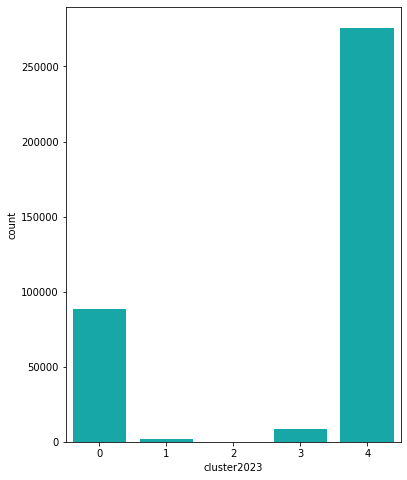

In [57]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.countplot(x='cluster2023', data=y, color="c")
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
sm = SMOTE(random_state=0)

sm.fit(X_train, y_train)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


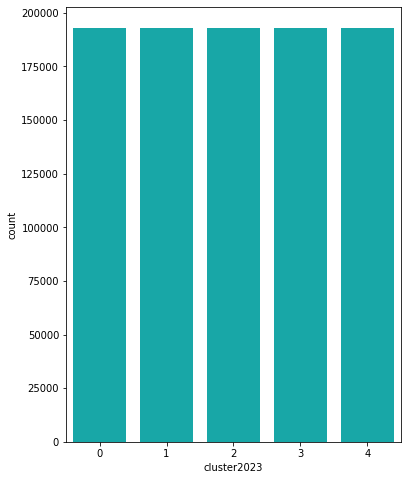

In [60]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.countplot(x='cluster2023', data=y_train_SMOTE, color="c")
plt.show()

In [61]:
#Create Generic function to fit data and display results/predictions
def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)

    # make predictions for train data
    y_pred_train = clf.predict(X_train)

    # make predictions for test data
    y_pred_test = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred_test))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* XGBoost Classifier * 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26584
           1       1.00      1.00      1.00       469
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00      2582
           4       1.00      1.00      1.00     82764

    accuracy                           1.00    112453
   macro avg       1.00      1.00      1.00    112453
weighted avg       1.00      1.00      1.00    112453


Confusion Matrix: 



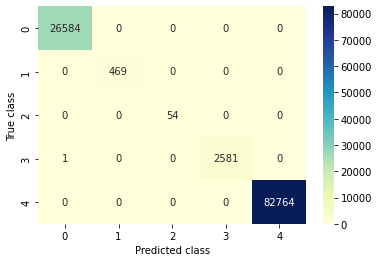

In [62]:
modelXGB = xgb.XGBClassifier(objective='multi:softmax', num_class=4, eval_metric="auc")
print('* XGBoost Classifier * \n')
fit_evaluate(modelXGB, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

## 2021 (inference)

In [63]:
X = df_cluster_2021.iloc[:, 1:]
cluster_pred = modelXGB.predict(X)
df_cluster_2021['cluster2021(inf.)'] = cluster_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
df_cluster_2021

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ent,join_duration(Month),No_downline,avg_amount,transaction_count,avg_ticket_size,online,avg_amount_3months,transaction_count_3months,avg_ticket_size_3month,online_3month,avg_amount_6months,transaction_count_6months,avg_ticket_size_6month,online_6month,last_transaction_day,mean_time_between_purchase,downlinesales,cluster2021(inf.)
0,8C4ECCCCC3Y,11,0,411500.00,2,1.00,0.50,50000.00,1.00,1.00,0.00,411500.00,2,1.00,0.50,50,28.00,0.00,0
1,8CCCCCC4R1F,18,0,1899000.00,2,4.00,1.00,2312000.00,1.00,6.00,1.00,1899000.00,2,4.00,1.00,36,41.50,0.00,0
2,BC11JW3U,169,41,416272.73,11,1.36,0.27,476500.00,2.00,1.50,0.00,416272.73,11,1.36,0.27,78,8.45,0.00,0
3,BCCCCRE3CZY,2,0,410000.00,1,1.00,0.00,410000.00,1.00,1.00,0.00,410000.00,1,1.00,0.00,56,0.00,0.00,0
4,BCCCCREW3WY,3,10,855833.33,3,1.33,0.33,855833.33,3.00,1.33,0.33,855833.33,3,1.33,0.33,19,10.33,4932000.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166771,TZZZC4WU,86,0,108833.33,12,2.17,0.00,124428.57,7.00,2.29,0.00,108833.33,12,2.17,0.00,11,12.25,0.00,0
166772,TZZZEQ4Y,87,0,1751000.00,4,5.00,0.00,1774500.00,2.00,3.50,0.00,1751000.00,4,5.00,0.00,25,30.25,0.00,0
166773,TZZZJ3WP,88,17,1125350.00,20,2.10,0.25,1208000.00,8.00,2.25,0.50,1125350.00,20,2.10,0.25,17,7.75,157671500.00,1
166774,TZZZREZF,88,0,510866.67,15,1.47,0.00,590555.56,9.00,1.67,0.00,510866.67,15,1.47,0.00,6,10.87,0.00,0


## 2022 (inference)

In [65]:
X = df_cluster_2022.iloc[:, 1:]
cluster_pred = modelXGB.predict(X)
df_cluster_2022['cluster2022(inf.)'] = cluster_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
df_cluster_2022

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ent,join_duration(Month),No_downline,avg_amount,transaction_count,avg_ticket_size,online,avg_amount_3months,transaction_count_3months,avg_ticket_size_3month,online_3month,avg_amount_6months,transaction_count_6months,avg_ticket_size_6month,online_6month,last_transaction_day,mean_time_between_purchase,downlinesales,cluster2022(inf.)
0,884R4EJZ0,45,1,1589000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,305,0.00,0.00,4
1,884RC4REI,104,27,1426500.00,2,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,305,3.50,1738000.00,4
2,8C4ECCCC44F,28,0,1218000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,307,0.00,0.00,4
3,8C4ECCCCC3Y,11,0,411500.00,2,1.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,606,28.00,0.00,4
4,8CC1CCCC3E0,43,0,149000.00,1,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,305,0.00,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325011,TZZZC4WU,104,0,102357.14,28,2.36,0.00,58500.00,2.00,1.50,0.00,78000.00,7.00,2.00,0.00,26,24.57,0.00,0
325012,TZZZEQ4Y,105,0,1795200.00,5,4.80,0.20,0.00,0.00,0.00,0.00,1972000.00,1.00,4.00,1.00,93,121.80,0.00,0
325013,TZZZJ3WP,106,29,1152500.00,60,2.35,0.50,1094409.09,11.00,2.55,0.73,1338026.32,19.00,2.47,0.63,19,11.82,434608900.00,1
325014,TZZZREZF,106,0,498300.00,30,1.57,0.03,489142.86,7.00,2.14,0.14,489142.86,7.00,2.14,0.14,7,23.93,0.00,0


## Segment Movement with Sandkey Diagram

In [67]:
df_segment_2021 = df_cluster_2021[['ent','cluster2021(inf.)']]
df_segment_2022 = df_cluster_2022[['ent','cluster2022(inf.)']]
df_segment_2023 = df_cluster_2023[['ent','cluster2023']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
df_segment_movement = df_segment_2021.merge(df_segment_2022, on='ent', how='outer')
df_segment_movement = df_segment_movement.merge(df_segment_2023, on='ent', how='outer')
df_segment_movement = df_segment_movement.fillna(5)
df_segment_movement[['cluster2021(inf.)','cluster2022(inf.)']] = df_segment_movement[['cluster2021(inf.)','cluster2022(inf.)']].astype(int)
df_segment_movement

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ent,cluster2021(inf.),cluster2022(inf.),cluster2023
0,8C4ECCCCC3Y,0,4,4
1,8CCCCCC4R1F,0,0,0
2,BC11JW3U,0,4,4
3,BCCCCRE3CZY,0,4,4
4,BCCCCREW3WY,0,0,0
...,...,...,...,...
374837,TZJQZQ10,5,5,0
374838,TZQ11WQ0,5,5,3
374839,TZQJR3WP,5,5,0
374840,TZQZWJ15,5,5,0


In [69]:
# label : cluster0-2021 cluster1-2021 cluster2-2021 cluster3-2021 cluster4-2021 non-member
#         cluster0-2022 cluster1-2022 cluster2-2022 cluster3-2022 cluster4-2022 non-member
#         cluster0-2023 cluster1-2023 cluster2-2023 cluster3-2023 cluster4-2023

source_lst = [] # 0 0 0 0 0 0      1 1 1 1 1 1     5 5 5 5 5  5        6 6 6 6 6         11 11 11 11 11
target_lst = [] # 6 7 8 9 10 11    6 7 8 9 10 11   6 7 8 9 10 11      12 13 14 15 16     12 13 14 15 16
for i  in range(12):
    for j in range(6):
        source_lst.append(i)
        if i < 6:
          target_lst.append(j+6)
        elif i >= 6 and j < 6 :
          target_lst.append(j+12)

print(source_lst)
print(target_lst)
# sankey values

val_lst = []
for i,j in zip(source_lst,target_lst) :
    if i < 6:
        d = df_segment_movement[(df_segment_movement['cluster2021(inf.)'] == i) & (df_segment_movement['cluster2022(inf.)'] == j-6)]
        val_lst.append(d.shape[0])
    else :
        d = df_segment_movement[(df_segment_movement['cluster2022(inf.)'] == i-6) & (df_segment_movement['cluster2023'] == j-12)]
        val_lst.append(d.shape[0])


print(val_lst)

#df_segment_movement[df_segment_movement['cluster2021(inf.)'] == 0] & df_segment_movement[df_segment_movement['cluster2022(inf.)'] == 0]
#df_segment_movement[df_segment_movement['cluster2021(inf.)'] == 0] & df_segment_movement[df_segment_movement['cluster2022(inf.)'] == 1]
#df_segment_movement[df_segment_movement['cluster2021(inf.)'] == 0] & df_segment_movement[df_segment_movement['cluster2022(inf.)'] == 2]
#df_segment_movement[df_segment_movement['cluster2021(inf.)'] == 0] & df_segment_movement[df_segment_movement['cluster2022(inf.)'] == 3]
#df_segment_movement[df_segment_movement['cluster2021(inf.)'] == 0] & df_segment_movement[df_segment_movement['cluster2022(inf.)'] == 4]
#df_segment_movement[df_segment_movement['cluster2021(inf.)'] == 0] & df_segment_movement[df_segment_movement['cluster2022(inf.)'] == 5]

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11]
[6, 7, 8, 9, 10, 11, 6, 7, 8, 9, 10, 11, 6, 7, 8, 9, 10, 11, 6, 7, 8, 9, 10, 11, 6, 7, 8, 9, 10, 11, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17]
[31517, 13, 2, 4910, 126904, 0, 0, 77, 94, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 1008, 1, 2106, 0, 0, 58, 0, 0, 1, 80, 0, 94529, 12, 2, 653, 63044, 49826, 32283, 0, 2, 1197, 92622, 0, 0, 1036, 74, 0, 0, 0, 0, 0, 104, 0, 0, 0, 0, 523, 0, 7147, 0, 0, 6853, 0, 0, 230, 182945, 0, 49479, 3, 0, 33, 311, 0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.1),
        label=['cluster0-2021', 'cluster1-2021', 'cluster2-2021','cluster3-2021', 'cluster4-Churn-2021', 'no-data',
               'cluster0-2022', 'cluster1-2022', 'cluster2-2022','cluster3-2022', 'cluster4-Churn-2022', 'no-data',
               'cluster0-2023', 'cluster1-2023', 'cluster2-2023','cluster3-2023', 'cluster4-Churn-2023'],
        color=[px.colors.qualitative.Set1[1], px.colors.qualitative.Set1[4], px.colors.qualitative.Set1[2],px.colors.qualitative.Set1[3], px.colors.qualitative.Set1[0], px.colors.qualitative.Set1[7], #2021
               px.colors.qualitative.Set1[1], px.colors.qualitative.Set1[4], px.colors.qualitative.Set1[2],px.colors.qualitative.Set1[3], px.colors.qualitative.Set1[0], px.colors.qualitative.Set1[7], #2022
               px.colors.qualitative.Set1[1], px.colors.qualitative.Set1[4], px.colors.qualitative.Set1[2],px.colors.qualitative.Set1[3], px.colors.qualitative.Set1[0]]                                #2023
    ),

    link=dict(
        source=source_lst,
        target=target_lst,
        value=val_lst,
        color=[px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7],  # line cluster 0
               px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7],  # line cluster 1
               px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7],  # line cluster 2
               px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7],  # line cluster 3
               px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7],  # line cluster 4
               px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7],  # line cluster 5
               px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7],  # line cluster 0
               px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7],  # line cluster 1
               px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7],  # line cluster 2
               px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7],  # line cluster 3
               px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7],  # line cluster 4
               px.colors.qualitative.Pastel1[1], px.colors.qualitative.Pastel1[4], px.colors.qualitative.Pastel1[2], px.colors.qualitative.Pastel1[3], px.colors.qualitative.Pastel1[0], px.colors.qualitative.Pastel1[7]   # line cluster 5
               ]
    ))])

fig.update_layout(title="Sankey Diagram<br>Customer Segment Movement by year", font_size=10)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
